In [23]:
 !pip install kaggle


In [24]:
# step 1: using data from kaggle csv
from google.colab import files
files.upload()


Saving diabetes.csv to diabetes (2).csv


{'diabetes (2).csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.25

In [25]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [26]:
#step 2: loading dataset from csv file
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns



In [27]:
#step 3: reading data
data = pd.read_csv('diabetes.csv')
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [28]:
#step 4: feature engineer to replace zero value for features skin thickness, glucose, blood preasure and more
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, data.mean())


In [29]:
#Step 5: split data into testing and training sets
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X2 = data[['Glucose', 'BloodPressure']]
Y2 = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())  # first few rows of the training feature set
print(y_train.head())  # first few rows of the training labels
print(X_test.head())   # first few rows of the testing feature set
print(y_test.head())   # first few rows of the testing labels


     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
60             2     84.0      69.105469      20.536458   79.799479   
618            9    112.0      82.000000      24.000000   79.799479   
346            1    139.0      46.000000      19.000000   83.000000   
294            0    161.0      50.000000      20.536458   79.799479   
231            6    134.0      80.000000      37.000000  370.000000   

           BMI  DiabetesPedigreeFunction  Age  
60   31.992578                     0.304   21  
618  28.200000                     1.282   50  
346  28.700000                     0.654   22  
294  21.900000                     0.254   65  
231  46.200000                     0.238   46  
60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
668            6     98.0           58.0      33.000000  190.000000  34.0   
324            2    112.0           75.0      32.000000   

In [30]:
#Step 6: creating classifer models and train models on training set first using a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#using decision tree classfier model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

#Using linear regression because it is the simple and most used algorithm for binary classification problems
#using decision tree classifer because it can handle categorical and numerical data, able to capture non linear relations


DecisionTreeClassifier()

In [31]:
#step 7: using model to predict on test set
log_reg_pred = log_reg.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
print("Logistic Regression Predictions:")
print(log_reg_pred)
print("Decision Tree Predictions:")
print(decision_tree_pred)


Logistic Regression Predictions:
[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
Decision Tree Predictions:
[1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 0]


In [32]:
#step 8: Report the accuracy of the models using the accuracy score and/or confusion matrix.
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)

#confusion matrix
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)
print("Logistic Regression Confusion Matrix:")
print(log_reg_cm)
print("Decision Tree Confusion Matrix:")
print(decision_tree_cm)

Logistic Regression Accuracy: 0.7662337662337663
Decision Tree Accuracy: 0.7272727272727273
Logistic Regression Confusion Matrix:
[[83 16]
 [20 35]]
Decision Tree Confusion Matrix:
[[72 27]
 [15 40]]


In [33]:
!pip install --upgrade scikit-learn
!pip install mlxtend

!pip install --upgrade numpy
!pip install --upgrade scipy




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


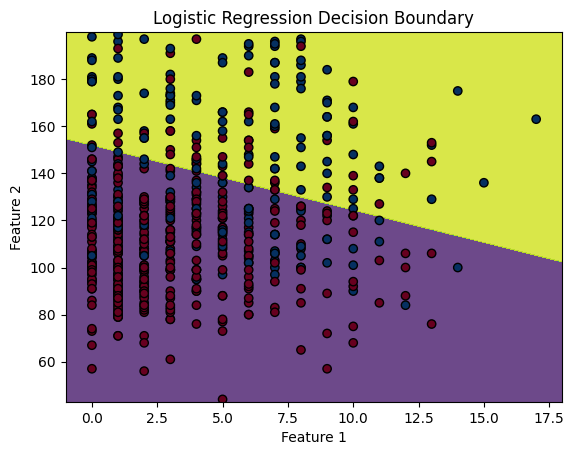

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


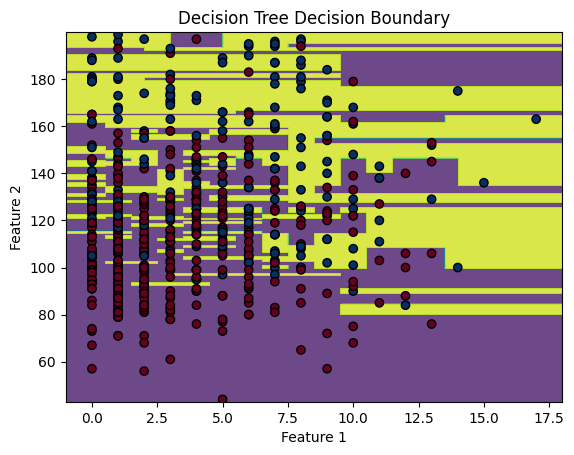

In [42]:
#Step 9: decision boundary visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Select two features for visualization
# Use .iloc to select by position
X_vis = X_train.iloc[:, :2]
X_test_vis = X_test.iloc[:, :2]

# Create a mesh grid
h = .02  # step size
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train Logistic Regression
log_reg2 = LogisticRegression(max_iter=1000)
log_reg2.fit(X_vis, y_train)

# Train Decision Tree Classifier
decision_tree2 = DecisionTreeClassifier()
decision_tree2.fit(X_vis, y_train)

# Plot decision boundary for Logistic Regression
Z_log_reg = log_reg2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_log_reg = Z_log_reg.reshape(xx.shape)
plt.contourf(xx, yy, Z_log_reg, alpha=0.8)
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdBu)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel('Feature 1 Glucose')
plt.ylabel('Feature 2 BloodPressure')
plt.show()

# Plot decision boundary for Decision Tree
Z_decision_tree = decision_tree2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_decision_tree = Z_decision_tree.reshape(xx.shape)
plt.contourf(xx, yy, Z_decision_tree, alpha=0.8)
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdBu)
plt.title("Decision Tree Decision Boundary")
plt.xlabel('Feature 1 Glucose')
plt.ylabel('Feature 2 BloodPressure')
plt.show()

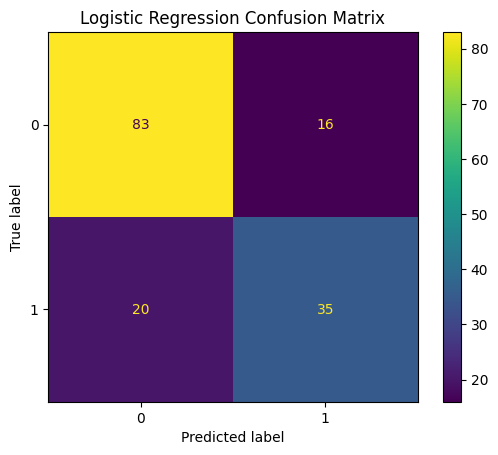

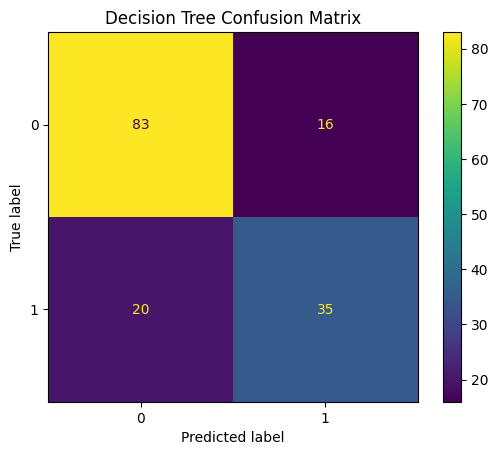

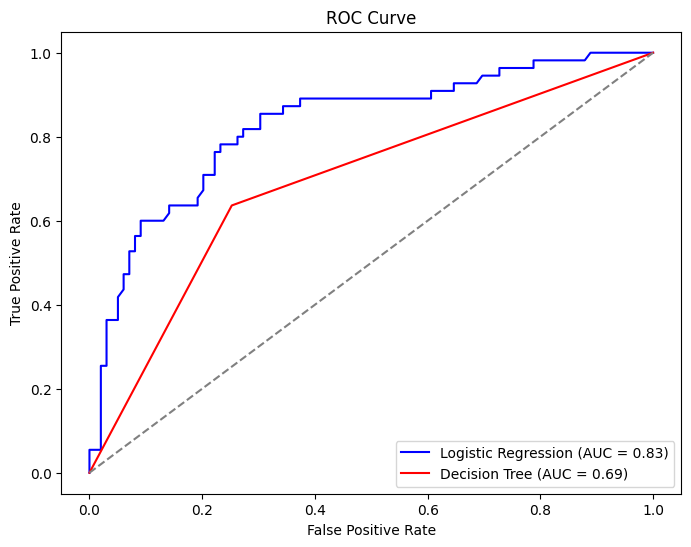

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

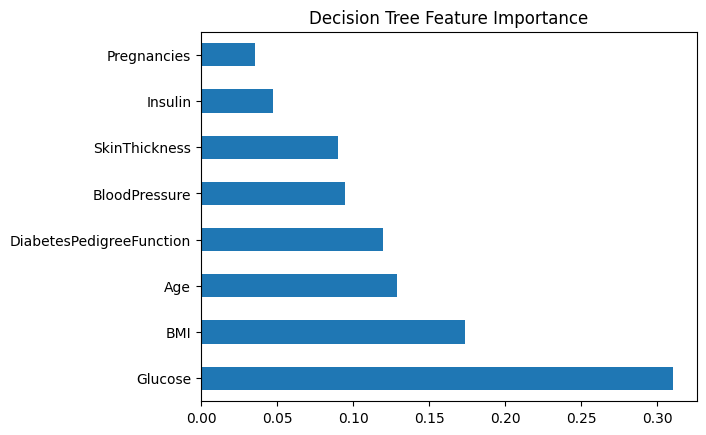

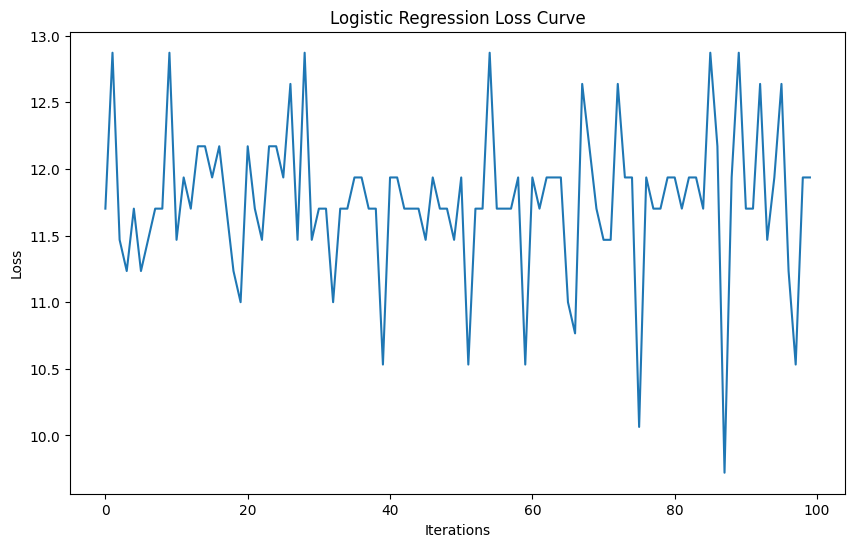

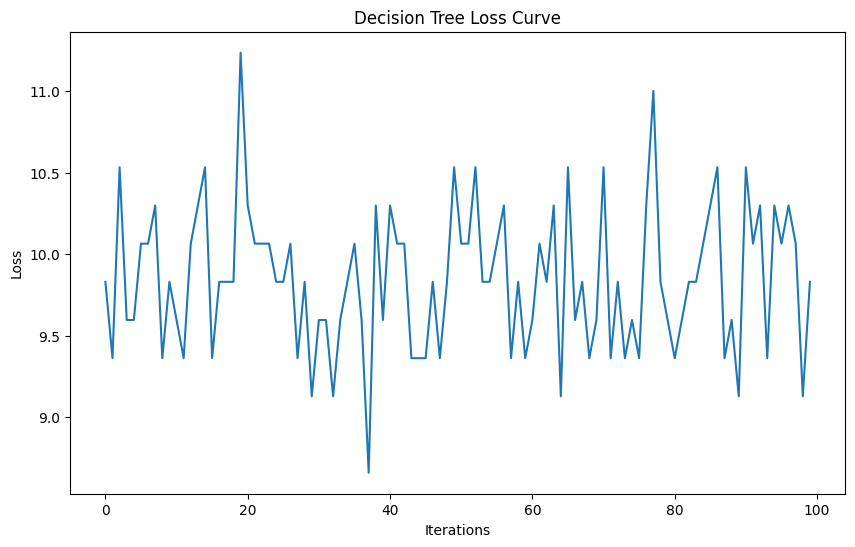

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

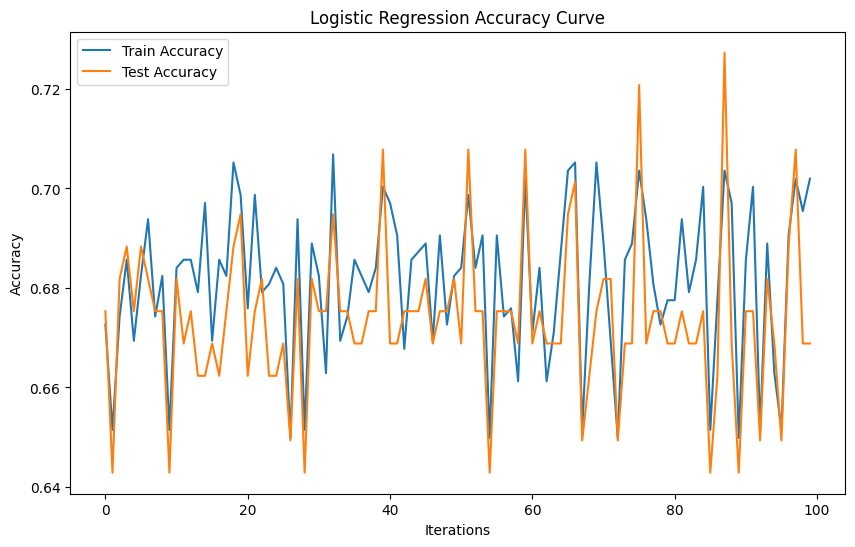

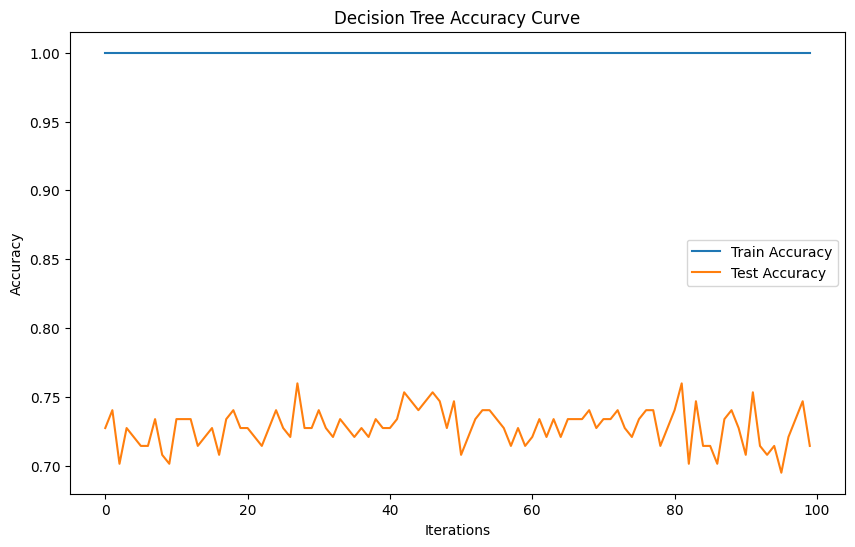

In [51]:
#step 9: visualizations, loss, accuracy, confusion matrix as graphic visualizations
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np



#plotting confusion matrix for logistic regression
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm)
disp_log_reg.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Plotting confusion matrix for decision tree
decision_tree_cm = confusion_matrix(y_test, log_reg_pred)
disp_decision_tree = ConfusionMatrixDisplay(confusion_matrix=decision_tree_cm)
disp_decision_tree.plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()


# plot_cofusion_matrix(log_reg, X_test, y_test)
# plt.title("Logistic Regression Confusion Matrix")
# plt.show()

# ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test)
# plt.title("Decision Tree Confusion Matrix")
# plt.show()

# ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
# plt.title("Logistic Regression Confusion Matrix")
# plt.show()


# # #plotting confusion matrix for decision tree
# # plot_cofusion_matrix(decision_tree, X_test, y_test)
# # plt.title("Decision Tree Confusion Matrix")
# # plt.show()

# ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test)
# plt.title("Decision Tree Confusion Matrix")
# plt.show()


# # plotting roc curve for logistic regression
# plot_roc_curve(log_reg, X_test, y_test)
# plt.title("Logistic Regression ROC Curve")
# plt.show()

# Using RocCurveDisplay instead of plot_roc_curve
from sklearn.metrics import RocCurveDisplay
# RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
# plt.title("Logistic Regression ROC Curve")
# plt.show()

#plotting roc curve for decision tree
# plot_roc_curve(decision_tree, X_test, y_test)
# plt.title("Decision Tree ROC Curve")
# plt.show()

# RocCurveDisplay.from_estimator(decision_tree, X_test, y_test)
# plt.title("Decision Tree ROC Curve")
# plt.show()


#predict probabilities
# y_log_reg_probs = log_reg.predict_proba(X_test)
# y_decision_tree_probs = decision_tree.predict_proba(X_test)

y_log_reg_probs = log_reg.predict_proba(X_test_vis)
y_decision_tree_probs = decision_tree.predict_proba(X_test)

#computing roc curve and area for each model
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_log_reg_probs[:, 1])
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_decision_tree, tpr_decision_tree, thresholds_decision_tree = roc_curve(y_test, y_decision_tree_probs[:, 1])
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)

#plotting roc curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_decision_tree, tpr_decision_tree, color='red', label='Decision Tree (AUC = %0.2f)' % roc_auc_decision_tree)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#plotting features for decision tree
feature_importance = pd.Series(decision_tree.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Decision Tree Feature Importance")
plt.show



#loss visualize for logistic regresion
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42)
losses_log_reg = []
for _ in range(100):  # 100 iterations
    sgd_clf.fit(X_train, y_train)
    y_proba = sgd_clf.predict_proba(X_test)
    loss = log_loss(y_test, y_proba)
    losses_log_reg.append(loss)

plt.figure(figsize=(10, 6))
# plt.plot(log_reg.loss_curve_)
plt.plot(losses_log_reg)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Logistic Regression Loss Curve')
plt.show()


#loss visualize for decision tree
losses_decision_tree = []

for _ in range(100):  # 100 iterations
    decision_tree.fit(X_train, y_train)
    y_proba = decision_tree.predict_proba(X_test)
    loss = log_loss(y_test, y_proba)
    losses_decision_tree.append(loss)


plt.figure(figsize=(10, 6))
plt.plot(losses_decision_tree)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Decision Tree Loss Curve')
plt.show()


# Accuracy visualize for logistic regression
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42)
train_accuracies_log_reg = []
test_accuracies_log_reg = []

for _ in range(100):
    sgd_clf.fit(X_train, y_train)
    train_accuracy = sgd_clf.score(X_train, y_train)
    test_accuracy = sgd_clf.score(X_test, y_test)
    train_accuracies_log_reg.append(train_accuracy)
    test_accuracies_log_reg.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_log_reg, label='Train Accuracy')
plt.plot(test_accuracies_log_reg, label='Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy Curve')
plt.legend()
plt.show()

# Accuracy visualize for decision tree
train_accuracies_decision_tree = []
test_accuracies_decision_tree = []

for _ in range(100):
    decision_tree.fit(X_train, y_train)
    train_accuracy = decision_tree.score(X_train, y_train)
    test_accuracy = decision_tree.score(X_test, y_test)
    train_accuracies_decision_tree.append(train_accuracy)
    test_accuracies_decision_tree.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_decision_tree, label='Train Accuracy')
plt.plot(test_accuracies_decision_tree, label='Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy Curve')
plt.legend()
plt.show()




# #pca principal component analysis, using to reduce dimensionality, noise reduction, feature extraction
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(X_train)
# # X_train_pca = pca.transform(X_train)
# # X_test_pca = pca.transform(X_test)
# X_train_pca = pca.fit_transform(X_train) #Fit and transform in one step
# X_test_pca = pca.transform(X_test)

# decision boundary for logistic regression
# X_vis = X_train[:, :2]
# X_test_vis = X_test[:, :2]

# # Create a mesh grid
# h = .02  # step size
# x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
# y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Train Logistic Regression
# log_reg = LogisticRegression(max_iter=1000)
# log_reg.fit(X_vis, y_train)

# # Train Decision Tree Classifier
# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_vis, y_train)

# # Plot decision boundary for Logistic Regression
# Z_log_reg = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
# Z_log_reg = Z_log_reg.reshape(xx.shape)
# plt.contourf(xx, yy, Z_log_reg, alpha=0.8)
# plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdBu)
# plt.title("Logistic Regression Decision Boundary")
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

# # Plot decision boundary for Decision Tree
# Z_decision_tree = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
# Z_decision_tree = Z_decision_tree.reshape(xx.shape)
# plt.contourf(xx, yy, Z_decision_tree, alpha=0.8)
# plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdBu)
# plt.title("Decision Tree Decision Boundary")
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()


# # Plot decision boundary for Logistic Regression
# Z_log_reg = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
# Z_log_reg = Z_log_reg.reshape(xx.shape)
# plt.contourf(xx, yy, Z_log_reg, alpha=0.8)
# plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdBu)
# plt.title("Logistic Regression Decision Boundary")
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

# Plot decision boundary for Decision Tree
# Z_decision_tree = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
# Z_decision_tree = Z_decision_tree.reshape(xx.shape)
# plt.contourf(xx, yy, Z_decision_tree, alpha=0.8)
# plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdBu)
# plt.title("Decision Tree Decision Boundary")
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()



# #plotting decision boundary
# #creating a mesh grid

# h= .02 #step size
# x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
# y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# #plotting decision boundary

# Z = log_reg.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.8)
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdBu)
# plt.title("Logistic Regression Decision Boundary")
# plt.xlabel('PCA Feature 1')
# plt.ylabel('PCA Feature 2')
# plt.show()

# #decision boundary for decision tree
# #plotting decision boundary
# # Z=decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
# Z=log_reg.predict(np.c_[xx_pca.ravel(), yy_pca.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.8)
# plt.scatter(X_train_iloc[:, 0], X_train_iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdBu)
# plt.title("Decision Tree Decision Boundary")
# plt.show()
# plt.xlabel('Glucose')
# plt.ylabel('BloodPressure')
# plt.show()

# DecisionBoundaryDisplay.from_estimator(log_reg, X_train, response_method="predict", cmap=plt.cm.RdBu, alpha=0.8)
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdBu)
# plt.title("Logistic Regression Decision Boundary")
# plt.show()

# #decision boundary for logistic regression
# DecisionBoundaryDisplay.from_estimator(log_reg, X_train_pca, response_method="predict", cmap=plt.cm.RdBu, alpha=0.8)
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdBu)
# plt.title("Logistic Regression Decision Boundary")
# plt.show()

# #decision boundary for decision tree
# DecisionBoundaryDisplay.from_estimator(decision_tree, X_train_pca, response_method="predict", cmap=plt.cm.RdBu, alpha=0.8)
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdBu)
# plt.title("Decision Tree Decision Boundary")
# plt.show()


# #decision boundary for decision tree
# DecisionBoundaryDisplay.from_estimator(decision_tree, X_train, response_method="predict", cmap=plt.cm.RdBu, alpha=0.8)
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdBu)
# plt.title("Decision Tree Decision Boundary")
# plt.show()


